In [1]:
import pandas as pd
import torch
from torch import nn
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import random

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

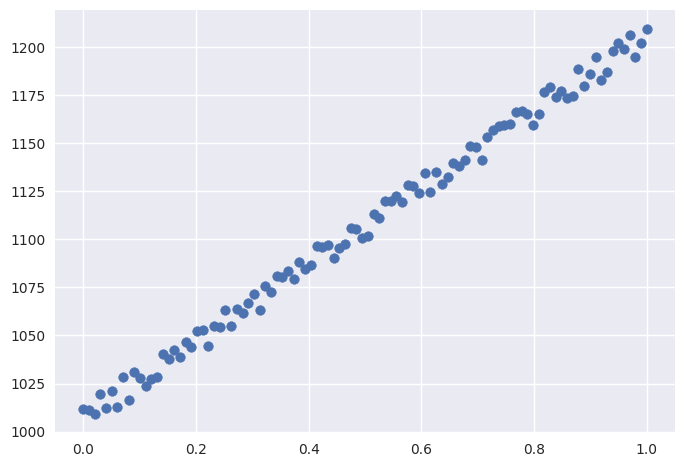

In [2]:
# create dummy data for training
X = np.array([i for i in range(100)], dtype=np.float32).reshape(-1, 1)
y = np.array([2*i + 1000 + random.random()*15 for i in X], dtype=np.float32).reshape(-1, 1)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

plt.scatter(X, y)

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class LinearRegression(nn.Module):
    
    def __init__(self, input_dim: int, output_dim: int):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim, bias=True)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [4]:
inputDims = 1
outputDims = 1
learningRate = 0.05
epochs = 700

model = LinearRegression(inputDims, outputDims).to(device)
criterion = nn.MSELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

Final loss = 19.129032135009766


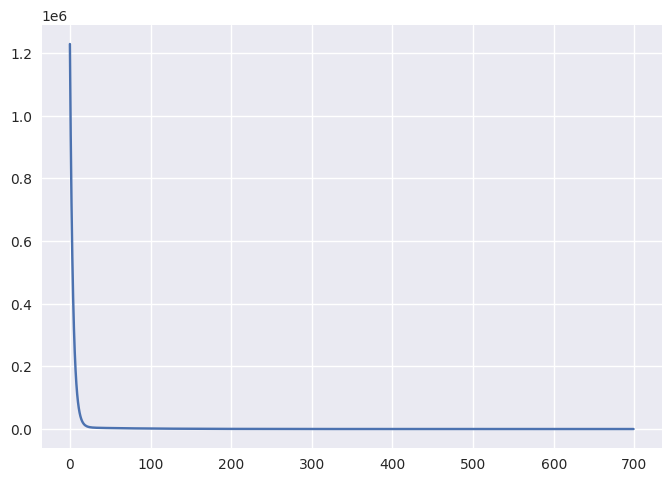

In [5]:
losses = []

inputs = torch.from_numpy(X).to(torch.float32).to(device)
labels = torch.from_numpy(y).to(torch.float32).to(device)

for epoch in range(epochs):
    
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    # print(loss)
    
    loss.backward()
    
    optimizer.step()
    
    losses.append(loss.item())

print(f"Final loss = {losses[-1]}")
plt.plot(range(epochs), losses)
plt.show()

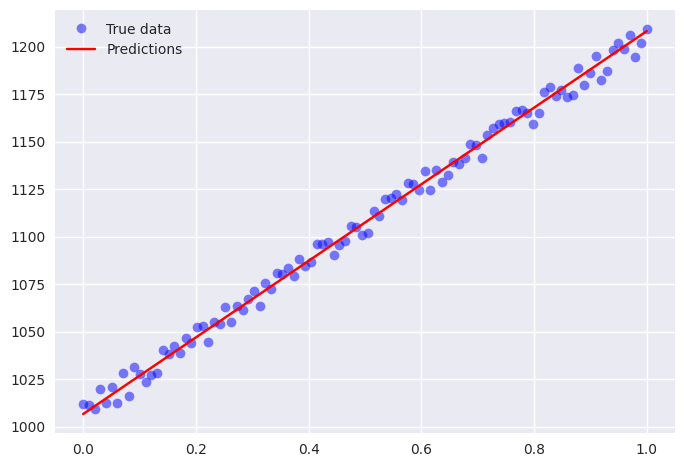

In [6]:
with torch.no_grad(): # we don't need gradients in the testing phase
    predicted = model(torch.from_numpy(X).to(device)).cpu().detach().numpy()


plt.clf()
plt.plot(X, y, 'bo', label='True data', alpha=0.5)
plt.plot(X, predicted, 'r-', label='Predictions')
plt.legend(loc='best')
plt.show()